In [7]:
from snowexsql.db import get_db
from snowexsql.data import SiteData, PointData, LayerData, ImageData
from snowexsql.conversions import query_to_geopandas 
db_name = 'snow:hackweek@db.snowexdata.org/snowex'
engine, session = get_db(db_name)


In [3]:
qry = session.query(PointData.type).distinct()
result = qry.all()
print(result)

[('depth',), ('swe',), ('two_way_travel',)]


In [4]:
qry = session.query(PointData.instrument).distinct()
result = qry.all()
print(result)

[(None,), ('Mala 1600 MHz GPR',), ('Mala 800 MHz GPR',), ('pulse EKKO Pro multi-polarization 1 GHz GPR',), ('pit ruler',), ('mesa',), ('magnaprobe',), ('camera',)]


In [9]:
qry = session.query(PointData.value, PointData.geom).filter(PointData.type == 'depth')
qry = qry.filter(PointData.instrument == 'pit ruler')
qry = qry.filter(PointData.utm_zone == 12)
result = query_to_geopandas(qry, engine)
print(result)

     value                            geom
0     83.0  POINT (754172.639 4325871.377)
1    100.0  POINT (742673.504 4325582.611)
2    117.0  POINT (746962.449 4321490.615)
3     98.0  POINT (745520.203 4322983.253)
4     92.0  POINT (743137.395 4324309.223)
..     ...                             ...
162  110.0  POINT (745418.642 4322598.986)
163  139.0  POINT (744082.713 4322607.453)
164   88.0  POINT (741369.238 4324492.547)
165  104.0  POINT (745936.457 4322754.031)
166  107.0  POINT (743728.251 4324257.506)

[167 rows x 2 columns]


<AxesSubplot:>

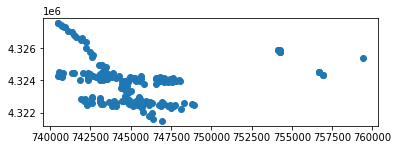

In [10]:
result.plot()